In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## 讀檔(已經預處理的pkl檔)

In [2]:
#Read  data
data = pd.read_pickle("./data/train_data.pkl")
data.head()

,air_store_id,2016-01-01,2016-01-02,2016-01-03,2016-01-04,2016-01-05,2016-01-06,2016-01-07,2016-01-08,2016-01-09,...,2017-04-17,2017-04-18,2017-04-19,2017-04-20,2017-04-21,2017-04-22,air_genre_name,air_area_name,latitude,longitude
0,air_00a91d42b08b08d9,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,19,35,17,38,55,18,6,44,35.694003,139.753595
1,air_0164b9927d20bcc3,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,2,1,8,1,26,6,6,62,35.658068,139.751599
2,air_0241aa3964b7f861,-1,-1,10,9,17,10,-1,5,8,...,12,19,8,-1,3,13,7,82,35.712607,139.779996
3,air_0328696196e46f18,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,3,-1,24,-1,19,8,4,98,34.701279,135.528090
4,air_034a3d5b40d5b1b1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,25,20,31,12,37,35,2,102,34.692337,135.472229


## Nomalization

把原本data = -1的用0替代，其餘非0的數值利用
$x' = \ln (1+x)$轉換

In [3]:
def log_transform(data):
    data = data.applymap(lambda x: 0 if x==-1 else x)
    data.iloc[:, 1:479] = np.log1p(data.iloc[:, 1:479])
    return data

data = log_transform(data)
data.head(10)

,air_store_id,2016-01-01,2016-01-02,2016-01-03,2016-01-04,2016-01-05,2016-01-06,2016-01-07,2016-01-08,2016-01-09,...,2017-04-17,2017-04-18,2017-04-19,2017-04-20,2017-04-21,2017-04-22,air_genre_name,air_area_name,latitude,longitude
0,air_00a91d42b08b08d9,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.995732,3.583519,2.890372,3.663562,4.025352,2.944439,6,44,35.694003,139.753595
1,air_0164b9927d20bcc3,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.098612,0.693147,2.197225,0.693147,3.295837,1.945910,6,62,35.658068,139.751599
2,air_0241aa3964b7f861,0.000000,0.0,2.397895,2.302585,2.890372,2.397895,0.000000,1.791759,2.197225,...,2.564949,2.995732,2.197225,0.000000,1.386294,2.639057,7,82,35.712607,139.779996
3,air_0328696196e46f18,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.386294,0.000000,3.218876,0.000000,2.995732,2.197225,4,98,34.701279,135.528090
4,air_034a3d5b40d5b1b1,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.258097,3.044522,3.465736,2.564949,3.637586,3.583519,2,102,34.692337,135.472229
5,air_036d4f1ee7285390,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.945910,3.496508,3.970292,2.944439,3.401197,3.178054,2,31,34.799767,135.360073
6,air_0382c794b73b51ad,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.386294,...,3.367296,3.295837,3.135494,3.218876,3.218876,3.713572,2,68,35.602125,139.671958
7,air_03963426c9312048,0.000000,0.0,0.000000,4.143135,3.433987,3.970292,3.637586,4.499810,4.110874,...,3.637586,3.295837,3.178054,3.258097,4.330733,4.060443,7,15,34.386245,132.455018
8,air_04341b588bde96cd,2.397895,0.0,0.000000,3.178054,3.583519,3.526361,3.970292,3.871201,4.276666,...,3.465736,3.555348,3.583519,2.197225,3.871201,3.828641,7,66,35.735623,139.651658
9,air_049f6d5b402a31b2,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.197225,2.708050,2.564949,2.833213,2.639057,3.401197,8,0,33.589216,130.392813


# 產生lstm input (shape = # , 39, 821)
因為`sample_submission`檔案裡面只有821個不同的air_data
產生連續39天的資料，前39天當$\mathbf{x}$，後39天當$y$<br>
例如用2016-1-1~2016-2-8作為$\mathbf{x}$ 2016-2-9~2016-3-18作為$y$

In [4]:
def generate_walkforward_data(data, input_seq_len, output_seq_len, date_start_col, date_end_col, val_data=0.05):
    date_cols = np.r_[date_start_col: date_end_col]
    train_points = len(date_cols) - input_seq_len - output_seq_len
    input_seqs = []
    output_seqs = []
    for i in range(train_points+1):
        inp_start = i + date_start_col
        inp_end = inp_start + input_seq_len
        out_end = inp_end + output_seq_len 
        input_seqs.append( data.iloc[: , inp_start:inp_end].values.reshape(1, -1, input_seq_len).transpose(0, 2, 1) )
        output_seqs.append( data.iloc[: , inp_end:out_end].values.reshape(1, -1, output_seq_len).transpose(0, 2, 1) )
        
    input_seqs = np.concatenate(input_seqs)
    output_seqs = np.concatenate(output_seqs)
    
    train_x, val_x, train_y, val_y = train_test_split(input_seqs, output_seqs, test_size=val_data, random_state=1126)
    
    return train_x, val_x, train_y, val_y

In [5]:
input_seq_len = 39
output_seq_len = 39
train_x, val_x, train_y, val_y = generate_walkforward_data(data, input_seq_len, output_seq_len, 1, 479)
print(train_x.shape, train_y.shape, val_x.shape, val_y.shape)

(380, 39, 821) (380, 39, 821) (21, 39, 821) (21, 39, 821)


In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM, TimeDistributed, RepeatVector
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

Using TensorFlow backend.
C:\Users\yaoweipai\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\yaoweipai\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\yaoweipai\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\yaoweipai\Anaconda3\lib\site-packages\tensorflow\python\fra

In [7]:
def buildManyToManyModel(train_data):
    model = Sequential()
    model.add(LSTM(10, input_shape = (train_data.shape[1], train_data.shape[2]),return_sequences=True))
    model.add(TimeDistributed(Dense(821)))
    model.compile(loss="mse", optimizer="adam")
    return model

In [8]:
model = buildManyToManyModel(train_x)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 39, 10)            33280     
_________________________________________________________________
time_distributed_1 (TimeDist (None, 39, 821)           9031      
Total params: 42,311
Trainable params: 42,311
Non-trainable params: 0
_________________________________________________________________


In [9]:
callback = EarlyStopping(monitor="loss", patience=3, verbose=1, mode="auto")
history = model.fit(train_x, train_y, epochs=1000, batch_size=50, validation_data=(val_x, val_y), callbacks=[callback])

Instructions for updating:
Use tf.cast instead.
Train on 380 samples, validate on 21 samples
Epoch 1/1000
380/380 [==============================] - 2s 6ms/step - loss: 5.6714 - val_loss: 5.0616
Epoch 2/1000
380/380 [==============================] - 1s 2ms/step - loss: 5.3948 - val_loss: 4.7974
Epoch 3/1000
380/380 [==============================] - 1s 2ms/step - loss: 5.1057 - val_loss: 4.5506
Epoch 4/1000
380/380 [==============================] - 1s 2ms/step - loss: 4.8369 - val_loss: 4.3170
Epoch 5/1000
380/380 [==============================] - 1s 2ms/step - loss: 4.5846 - val_loss: 4.0990
Epoch 6/1000
380/380 [==============================] - 1s 2ms/step - loss: 4.3476 - val_loss: 3.8980
Epoch 7/1000
380/380 [==============================] - 1s 2ms/step - loss: 4.1289 - val_loss: 3.7129
Epoch 8/1000
380/380 [==============================] - 1s 2ms/step - loss: 3.9264 - val_loss: 3.5425
Epoch 9/1000
380/380 [==============================] - 1s 2ms/step - loss: 3.7380 - val_lo

380/380 [==============================] - 1s 2ms/step - loss: 1.2418 - val_loss: 1.2181
Epoch 78/1000
380/380 [==============================] - 1s 2ms/step - loss: 1.2358 - val_loss: 1.2109
Epoch 79/1000
380/380 [==============================] - 1s 2ms/step - loss: 1.2302 - val_loss: 1.2041
Epoch 80/1000
380/380 [==============================] - 1s 2ms/step - loss: 1.2245 - val_loss: 1.1972
Epoch 81/1000
380/380 [==============================] - 1s 2ms/step - loss: 1.2192 - val_loss: 1.1902
Epoch 82/1000
380/380 [==============================] - 1s 2ms/step - loss: 1.2139 - val_loss: 1.1834
Epoch 83/1000
380/380 [==============================] - 1s 2ms/step - loss: 1.2086 - val_loss: 1.1768
Epoch 84/1000
380/380 [==============================] - 1s 2ms/step - loss: 1.2036 - val_loss: 1.1705
Epoch 85/1000
380/380 [==============================] - 1s 2ms/step - loss: 1.1987 - val_loss: 1.1641
Epoch 86/1000
380/380 [==============================] - 1s 2ms/step - loss: 1.1939 - v

380/380 [==============================] - 1s 2ms/step - loss: 1.0152 - val_loss: 0.9287
Epoch 157/1000
380/380 [==============================] - 1s 2ms/step - loss: 1.0141 - val_loss: 0.9272
Epoch 158/1000
380/380 [==============================] - 1s 2ms/step - loss: 1.0130 - val_loss: 0.9260
Epoch 159/1000
380/380 [==============================] - 1s 2ms/step - loss: 1.0120 - val_loss: 0.9246
Epoch 160/1000
380/380 [==============================] - 1s 2ms/step - loss: 1.0110 - val_loss: 0.9233
Epoch 161/1000
380/380 [==============================] - 1s 2ms/step - loss: 1.0099 - val_loss: 0.9220
Epoch 162/1000
380/380 [==============================] - 1s 2ms/step - loss: 1.0089 - val_loss: 0.9207
Epoch 163/1000
380/380 [==============================] - 1s 2ms/step - loss: 1.0080 - val_loss: 0.9193
Epoch 164/1000
380/380 [==============================] - 1s 2ms/step - loss: 1.0070 - val_loss: 0.9183
Epoch 165/1000
380/380 [==============================] - 1s 2ms/step - loss: 1

Epoch 235/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9727 - val_loss: 0.8761
Epoch 236/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9724 - val_loss: 0.8758
Epoch 237/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9722 - val_loss: 0.8755
Epoch 238/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9720 - val_loss: 0.8753
Epoch 239/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9718 - val_loss: 0.8751
Epoch 240/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9716 - val_loss: 0.8748
Epoch 241/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9714 - val_loss: 0.8746
Epoch 242/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9712 - val_loss: 0.8745
Epoch 243/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9709 - val_loss: 0.8743
Epoch 244/1000
380/380 [==============================] - 1s 2ms

Epoch 314/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9605 - val_loss: 0.8641
Epoch 315/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9603 - val_loss: 0.8640
Epoch 316/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9602 - val_loss: 0.8640
Epoch 317/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9601 - val_loss: 0.8640
Epoch 318/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9600 - val_loss: 0.8639
Epoch 319/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9599 - val_loss: 0.8638
Epoch 320/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9597 - val_loss: 0.8635
Epoch 321/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9596 - val_loss: 0.8635
Epoch 322/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9595 - val_loss: 0.8633
Epoch 323/1000
380/380 [==============================] - 1s 2ms

Epoch 393/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9524 - val_loss: 0.8577
Epoch 394/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9523 - val_loss: 0.8576
Epoch 395/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9522 - val_loss: 0.8576
Epoch 396/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9521 - val_loss: 0.8575
Epoch 397/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9520 - val_loss: 0.8574
Epoch 398/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9519 - val_loss: 0.8574
Epoch 399/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9519 - val_loss: 0.8573
Epoch 400/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9517 - val_loss: 0.8572
Epoch 401/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9517 - val_loss: 0.8570
Epoch 402/1000
380/380 [==============================] - 1s 2ms

Epoch 472/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9456 - val_loss: 0.8527
Epoch 473/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9456 - val_loss: 0.8526
Epoch 474/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9456 - val_loss: 0.8524
Epoch 475/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9454 - val_loss: 0.8524
Epoch 476/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9454 - val_loss: 0.8524
Epoch 477/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9453 - val_loss: 0.8524
Epoch 478/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9453 - val_loss: 0.8523
Epoch 479/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9452 - val_loss: 0.8523
Epoch 480/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9451 - val_loss: 0.8521
Epoch 481/1000
380/380 [==============================] - 1s 2ms

Epoch 551/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9413 - val_loss: 0.8491
Epoch 552/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9413 - val_loss: 0.8492
Epoch 553/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9412 - val_loss: 0.8490
Epoch 554/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9412 - val_loss: 0.8490
Epoch 555/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9411 - val_loss: 0.8490
Epoch 556/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9411 - val_loss: 0.8491
Epoch 557/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9411 - val_loss: 0.8489
Epoch 558/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9410 - val_loss: 0.8489
Epoch 559/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.9410 - val_loss: 0.8490
Epoch 560/1000
380/380 [==============================] - 1s 2ms

Epoch 630/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.8150 - val_loss: 0.7425
Epoch 631/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.8143 - val_loss: 0.7420
Epoch 632/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.8140 - val_loss: 0.7417
Epoch 633/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.8131 - val_loss: 0.7410
Epoch 634/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.8124 - val_loss: 0.7405
Epoch 635/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.8116 - val_loss: 0.7399
Epoch 636/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.8111 - val_loss: 0.7394
Epoch 637/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.8104 - val_loss: 0.7389
Epoch 638/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.8098 - val_loss: 0.7385
Epoch 639/1000
380/380 [==============================] - 1s 2ms

Epoch 709/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.7829 - val_loss: 0.7161
Epoch 710/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.7828 - val_loss: 0.7162
Epoch 711/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.7826 - val_loss: 0.7159
Epoch 712/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.7824 - val_loss: 0.7156
Epoch 713/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.7821 - val_loss: 0.7157
Epoch 714/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.7819 - val_loss: 0.7154
Epoch 715/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.7816 - val_loss: 0.7152
Epoch 716/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.7814 - val_loss: 0.7150
Epoch 717/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.7812 - val_loss: 0.7146
Epoch 718/1000
380/380 [==============================] - 1s 2ms

Epoch 788/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.7686 - val_loss: 0.7030
Epoch 789/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.7684 - val_loss: 0.7027
Epoch 790/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.7683 - val_loss: 0.7027
Epoch 791/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.7681 - val_loss: 0.7026
Epoch 792/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.7680 - val_loss: 0.7027
Epoch 793/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.7682 - val_loss: 0.7024
Epoch 794/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.7679 - val_loss: 0.7021
Epoch 795/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.7682 - val_loss: 0.7028
Epoch 796/1000
380/380 [==============================] - 1s 2ms/step - loss: 0.7685 - val_loss: 0.7039
Epoch 797/1000
380/380 [==============================] - 1s 2ms

In [10]:
print(history.history.keys())

dict_keys(['val_loss', 'loss'])


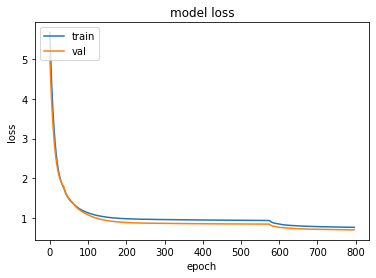

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

In [12]:
date_info = pd.read_csv('./data/sample_submission.csv') 
date_info.head(39)

,id,visitors
0,air_00a91d42b08b08d9_2017-04-23,0
1,air_00a91d42b08b08d9_2017-04-24,0
2,air_00a91d42b08b08d9_2017-04-25,0
3,air_00a91d42b08b08d9_2017-04-26,0
4,air_00a91d42b08b08d9_2017-04-27,0
5,air_00a91d42b08b08d9_2017-04-28,0
6,air_00a91d42b08b08d9_2017-04-29,0
7,air_00a91d42b08b08d9_2017-04-30,0
8,air_00a91d42b08b08d9_2017-05-01,0
9,air_00a91d42b08b08d9_2017-05-02,0


In [13]:
train_points = 478 - 39 - 39
date_start_col = 1
inp_start = train_points + date_start_col
inp_end = inp_start + input_seq_len
out_end = inp_end + output_seq_len 
last_train_day = data.iloc[: , inp_end:out_end]

In [14]:
last_train_day

,2017-03-15,2017-03-16,2017-03-17,2017-03-18,2017-03-19,2017-03-20,2017-03-21,2017-03-22,2017-03-23,2017-03-24,...,2017-04-13,2017-04-14,2017-04-15,2017-04-16,2017-04-17,2017-04-18,2017-04-19,2017-04-20,2017-04-21,2017-04-22
0,3.761200,3.688879,3.637586,1.609438,0.000000,0.000000,3.367296,3.178054,3.332205,3.555348,...,3.555348,3.688879,0.000000,0.000000,2.995732,3.583519,2.890372,3.663562,4.025352,2.944439
1,2.484907,1.791759,2.772589,1.945910,0.000000,0.000000,0.000000,2.944439,2.397895,2.944439,...,2.639057,2.079442,0.693147,0.000000,1.098612,0.693147,2.197225,0.693147,3.295837,1.945910
2,2.079442,0.000000,1.945910,2.639057,2.564949,2.079442,1.945910,1.609438,0.000000,2.197225,...,0.000000,1.609438,2.772589,2.397895,2.564949,2.995732,2.197225,0.000000,1.386294,2.639057
3,0.000000,1.945910,1.791759,0.000000,3.401197,2.197225,2.639057,2.772589,3.218876,0.000000,...,0.000000,2.302585,1.609438,1.386294,1.386294,0.000000,3.218876,0.000000,2.995732,2.197225
4,2.944439,3.044522,2.944439,3.526361,3.761200,4.204693,2.564949,2.079442,3.091042,3.135494,...,3.135494,2.944439,3.465736,3.688879,3.258097,3.044522,3.465736,2.564949,3.637586,3.583519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,3.295837,2.079442,3.367296,3.178054,2.079442,0.000000,2.197225,3.091042,3.135494,1.945910,...,2.890372,3.044522,3.044522,2.772589,2.302585,2.833213,2.890372,3.178054,3.367296,2.708050
817,2.995732,3.367296,2.708050,2.833213,3.367296,2.708050,3.295837,3.332205,3.091042,3.433987,...,2.484907,3.637586,3.871201,3.496508,2.772589,3.135494,3.496508,3.295837,3.332205,3.988984
818,2.639057,1.791759,1.791759,2.079442,2.639057,2.079442,0.000000,1.386294,2.197225,2.079442,...,1.945910,0.693147,3.178054,2.302585,2.079442,0.000000,2.639057,0.693147,1.386294,1.791759
819,2.995732,3.332205,3.433987,2.944439,0.000000,0.000000,2.564949,3.496508,3.044522,3.526361,...,2.833213,3.637586,3.258097,0.000000,2.708050,3.367296,3.367296,3.178054,4.007333,0.693147


In [15]:
last_train_day = last_train_day.values.reshape(1, -1, output_seq_len).transpose(0, 2, 1)

In [16]:
last_train_day.shape

(1, 39, 821)

In [17]:
last_train_day[0]

array([[3.76120012, 2.48490665, 2.07944154, ..., 2.63905733, 2.99573227,
        2.07944154],
       [3.68887945, 1.79175947, 0.        , ..., 1.79175947, 3.33220451,
        1.38629436],
       [3.63758616, 2.77258872, 1.94591015, ..., 1.79175947, 3.4339872 ,
        2.19722458],
       ...,
       [3.66356165, 0.69314718, 0.        , ..., 0.69314718, 3.17805383,
        1.09861229],
       [4.02535169, 3.29583687, 1.38629436, ..., 1.38629436, 4.00733319,
        1.60943791],
       [2.94443898, 1.94591015, 2.63905733, ..., 1.79175947, 0.69314718,
        1.79175947]])

In [18]:
test_output = model.predict(last_train_day)

In [19]:
test_output.shape

(1, 39, 821)

In [20]:
test_output

array([[[0.5598955 , 0.24129564, 1.827618  , ..., 1.6214377 ,
         0.52164596, 0.8735753 ],
        [2.459498  , 1.1773065 , 1.6919785 , ..., 1.7574815 ,
         2.35845   , 1.5112444 ],
        [2.9465075 , 1.416747  , 1.6156555 , ..., 1.7529542 ,
         2.8299534 , 1.659169  ],
        ...,
        [2.39311   , 1.1456858 , 1.7824115 , ..., 1.8339998 ,
         2.293033  , 1.5210469 ],
        [2.934145  , 1.4108142 , 1.6290051 , ..., 1.7638925 ,
         2.8178215 , 1.659687  ],
        [3.0190248 , 1.4524084 , 1.6049381 , ..., 1.7528939 ,
         2.9001522 , 1.6814375 ]]], dtype=float32)

In [21]:
people = np.exp(test_output[0][:,0]) - 1

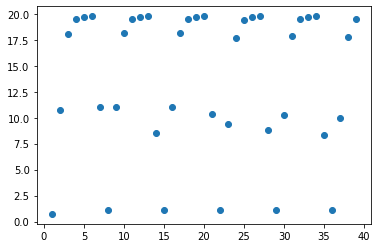

In [22]:
day = np.arange(1,40)
plt.scatter(day,people)

In [23]:
visitor = np.exp(test_output[0]) - 1

In [24]:
visitor.shape

(39, 821)

In [25]:
result = visitor.T.ravel()

In [26]:
result.shape

(32019,)

In [27]:
datetime = pd.date_range('2017-04-23',periods=39)
string_list = []
for i in range(len(data['air_store_id'])): #821
    for j in range(len(datetime)): #39
        string_list.append(data['air_store_id'][i]+'_'+datetime[j].strftime('%Y-%m-%d'))

In [28]:
string_list[32019-39:32019]

['air_fff68b929994bfbd_2017-04-23',
 'air_fff68b929994bfbd_2017-04-24',
 'air_fff68b929994bfbd_2017-04-25',
 'air_fff68b929994bfbd_2017-04-26',
 'air_fff68b929994bfbd_2017-04-27',
 'air_fff68b929994bfbd_2017-04-28',
 'air_fff68b929994bfbd_2017-04-29',
 'air_fff68b929994bfbd_2017-04-30',
 'air_fff68b929994bfbd_2017-05-01',
 'air_fff68b929994bfbd_2017-05-02',
 'air_fff68b929994bfbd_2017-05-03',
 'air_fff68b929994bfbd_2017-05-04',
 'air_fff68b929994bfbd_2017-05-05',
 'air_fff68b929994bfbd_2017-05-06',
 'air_fff68b929994bfbd_2017-05-07',
 'air_fff68b929994bfbd_2017-05-08',
 'air_fff68b929994bfbd_2017-05-09',
 'air_fff68b929994bfbd_2017-05-10',
 'air_fff68b929994bfbd_2017-05-11',
 'air_fff68b929994bfbd_2017-05-12',
 'air_fff68b929994bfbd_2017-05-13',
 'air_fff68b929994bfbd_2017-05-14',
 'air_fff68b929994bfbd_2017-05-15',
 'air_fff68b929994bfbd_2017-05-16',
 'air_fff68b929994bfbd_2017-05-17',
 'air_fff68b929994bfbd_2017-05-18',
 'air_fff68b929994bfbd_2017-05-19',
 'air_fff68b929994bfbd_2017-

In [29]:
df = pd.DataFrame(result, index = string_list,columns=['visitors'])

In [30]:
df.index.name = 'id'

In [31]:
df

,visitors
id,
air_00a91d42b08b08d9_2017-04-23,0.750490
air_00a91d42b08b08d9_2017-04-24,10.698936
air_00a91d42b08b08d9_2017-04-25,18.039341
air_00a91d42b08b08d9_2017-04-26,19.507151
air_00a91d42b08b08d9_2017-04-27,19.717909
...,...
air_fff68b929994bfbd_2017-05-27,3.390831
air_fff68b929994bfbd_2017-05-28,2.002104
air_fff68b929994bfbd_2017-05-29,3.577014


In [32]:
df.to_csv('result2.csv')